In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Twitter Analysis

In [ ]:
df = pd.read_excel("/content/twitter accounts data pre-elections.xlsx")
df.head()

,type,id,url,twitterUrl,text,fullText,source,retweetCount,replyCount_x,likeCount,...,favouriteCount,viewsCount,post_url,post_text,Author Handle,replytext en,sentiment reply,sentiment_score,emotion reply,emotion_score
0,tweet,1995947051671233024,https://x.com/nbstv/status/1995947051671232902,https://twitter.com/nbstv/status/1995947051671...,.@adam_kungu: Police are saying that @NUP_Ug s...,.@adam_kungu: Police are saying that @NUP_Ug s...,Twitter for Android,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,LABEL_1,0.451272,neutral,0.954960
1,tweet,1995944035882848000,https://x.com/nbstv/status/1995944035882848365,https://twitter.com/nbstv/status/1995944035882...,Hon. @JosephSsewungu: You can’t tell me that @...,Hon. @JosephSsewungu: You can’t tell me that @...,Twitter for Android,0,1,8,...,0.0,62.0,https://x.com/nbstv/status/1995944035882848365,Hon. @JosephSsewungu: You can’t tell me that @...,@nbstv,@NBSTV @josephssephswungu @heBobiwine Tell kun...,LABEL_1,0.492356,neutral,0.925923
2,tweet,1995943897210781952,https://x.com/nbstv/status/1995943897210781869,https://twitter.com/nbstv/status/1995943897210...,Hon. @JosephSsewungu: Are you trying to tell m...,Hon. @JosephSsewungu: Are you trying to tell m...,Twitter for Android,0,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,LABEL_1,0.451272,neutral,0.954960
3,tweet,1995941797227553024,https://x.com/nbstv/status/1995941797227553017,https://twitter.com/nbstv/status/1995941797227...,.@rwomchechen: @NUP_Ug is violating @UgandaEC ...,.@rwomchechen: @NUP_Ug is violating @UgandaEC ...,Twitter for Android,0,8,4,...,0.0,12.0,https://x.com/nbstv/status/1995941797227553017,.@rwomchechen: @NUP_Ug is violating @UgandaEC ...,@nbstv,@nbstv @rwomchechen @NUP_Ug @UgandaEc that Typ...,LABEL_0,0.816451,neutral,0.388300
4,tweet,1995940711284503040,https://x.com/nbstv/status/1995940711284502547,https://twitter.com/nbstv/status/1995940711284...,.@rwomchechen: Elias Nalukoola's election was ...,.@rwomchechen: Elias Nalukoola's election was ...,Twitter for Android,0,4,4,...,0.0,85.0,https://x.com/nbstv/status/1995940711284502547,.@rwomchechen: Elias Nalukoola's election was ...,@nbstv,@nbstv @rwommchechen 📌 https://t.co/94rdHom65k,LABEL_1,0.851338,neutral,0.927828


In [3]:
df.columns

Index(['type', 'id', 'url', 'twitterUrl', 'text', 'fullText', 'source',
       'retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x',
       'viewCount', 'createdAt', 'lang', 'bookmarkCount', 'isReply',
       'conversationId_x', 'possiblySensitive', 'isPinned', 'author_x',
       'extendedEntities', 'card', 'place', 'entities', 'isRetweet', 'isQuote',
       'media_x', 'isConversationControlled', 'inReplyToId', 'inReplyToUserId',
       'inReplyToUsername', 'retweet', 'quoteId', 'quote', 'postUrl', 'postId',
       'replyId', 'inReplyTo', 'replyUrl', 'replyText', 'timestamp',
       'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle', 'replytext en',
       'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score'],
      dtype='object')

In [4]:
df['date'] = pd.to_datetime(df['createdAt'], errors='coerce')
df = df[df['date'] >= '2025-07-01']
df['date']

/tmp/ipython-input-386246802.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['createdAt'], errors='coerce')


,date
0,2025-12-02 20:03:54+00:00
1,2025-12-02 19:51:55+00:00
2,2025-12-02 19:51:22+00:00
3,2025-12-02 19:43:01+00:00
4,2025-12-02 19:38:43+00:00
...,...
109040,2025-07-04 11:03:22+00:00
109056,2025-07-05 05:43:28+00:00
109057,2025-07-05 05:56:17+00:00
109058,2025-07-04 07:48:54+00:00


## Posts Distribution over time

In [5]:
posts_df = df.drop_duplicates(subset=['twitterUrl'], keep='first')

comments_df = df[['postUrl', 'postId',
       'replyId', 'inReplyTo', 'replyUrl', 'replyText', 'timestamp',
       'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle', 'replytext en',
       'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score']]

comments_df = comments_df.dropna(subset=['postUrl'])

posts_df.shape, comments_df.shape

((87817, 58), (1346, 23))

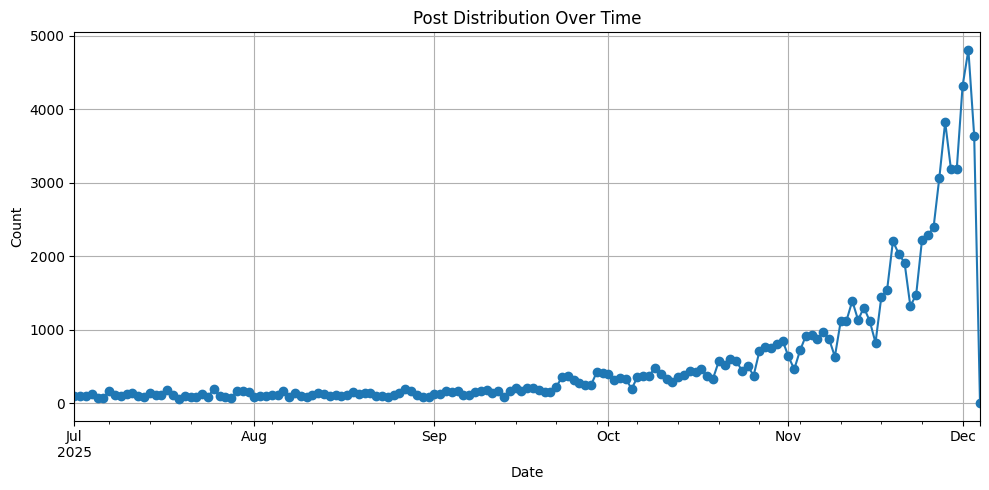

In [6]:
daily_counts = posts_df.set_index('date').resample('D').size()

# 2. Plot the results
plt.figure(figsize=(10, 5))
daily_counts.plot(kind='line', marker='o')

plt.title('Post Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()

## Who are the most active participants in election-related conversations?


In [7]:
import pandas as pd
import ast

# Define a function to safely parse the string and get the username
def get_username(val):
    # 1. If it's already a dictionary, just return the value
    if isinstance(val, dict):
        return val.get('userName')

    # 2. If it's a string, try to convert it to a dictionary
    if isinstance(val, str):
        try:
            # literal_eval safely evaluates a string containing a Python literal (like a dict)
            val_dict = ast.literal_eval(val)
            if isinstance(val_dict, dict):
                return val_dict.get('userName')
        except (ValueError, SyntaxError):
            # Return None if the string is malformed
            return None

    # 3. If it's NaN or anything else, return None
    return None

# Apply the function
posts_df['post author'] = posts_df['author_x'].apply(get_username)

# Check the results
print(posts_df['post author'].head())

0    nbstv
1    nbstv
2    nbstv
3    nbstv
4    nbstv
Name: post author, dtype: object


post author
DailyMonitor       500
WinnieKiiza        500
ntvuganda          500
NandalaMafabi      500
OppresedUgandan    500
CanaryMugume       500
AidenKaliisa       500
SpireJim           500
JoelSsenyonyi      500
Pliam_             500
Name: count, dtype: int64


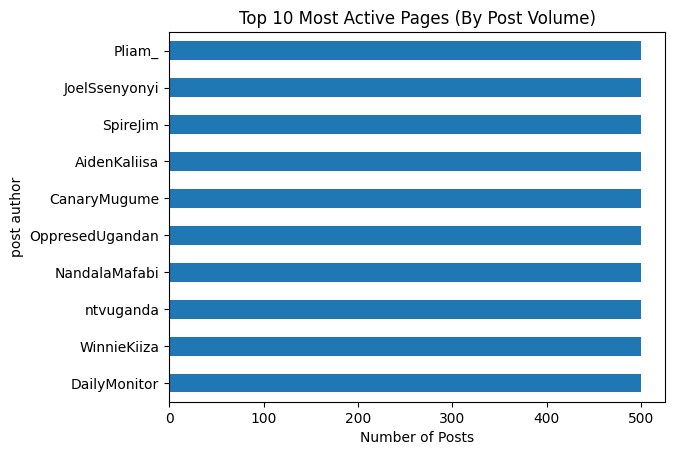

In [8]:
# Count the number of posts per page/user
top_posters = posts_df['post author'].value_counts().head(10)

print(top_posters)

# Visualization
top_posters.plot(kind='barh', title='Top 10 Most Active Pages (By Post Volume)')
plt.xlabel('Number of Posts')
plt.show()

## By Engagement (Impact)

In [9]:
posts_df = posts_df[['type', 'id', 'url', 'twitterUrl', 'text', 'fullText', 'source',
       'retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x',
       'viewCount', 'createdAt', 'lang', 'bookmarkCount', 'isReply',
       'conversationId_x', 'possiblySensitive', 'isPinned', 'author_x',
       'extendedEntities', 'card', 'place', 'entities', 'isRetweet', 'isQuote',
       'media_x', 'isConversationControlled', 'inReplyToId', 'inReplyToUserId',
       'inReplyToUsername', 'retweet', 'quoteId', 'quote', 'post author']]

posts_df = df.drop_duplicates(subset=['twitterUrl'], keep='first')

In [10]:
posts_df['post author'] = posts_df['author_x'].apply(get_username)


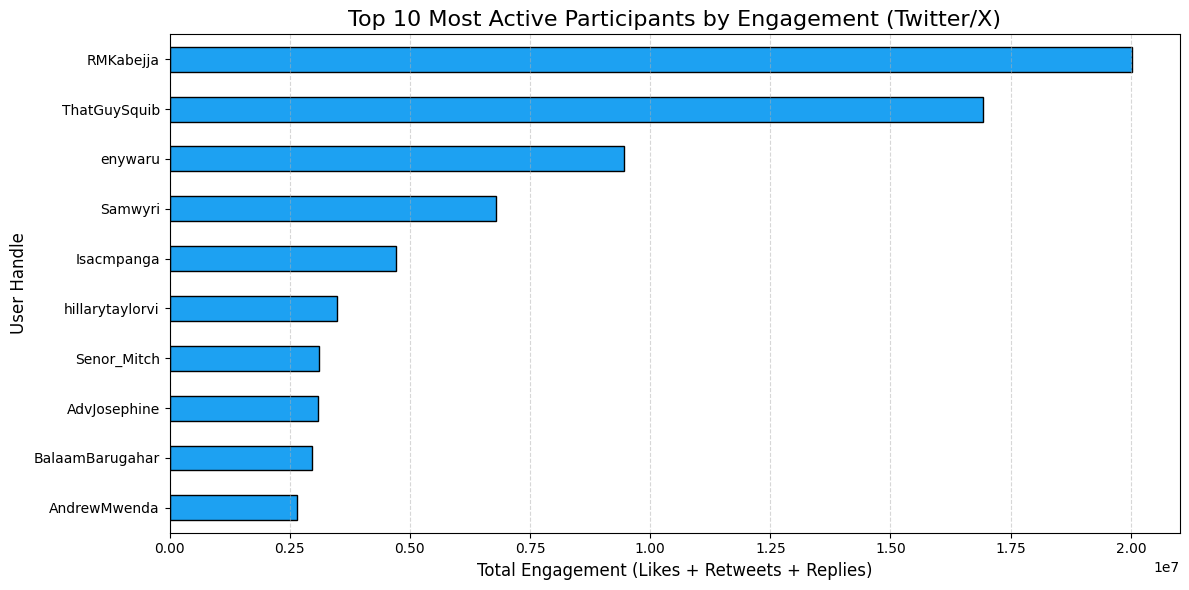

In [11]:
metrics = ['retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x']

posts_df[metrics] = posts_df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

posts_df['total_engagement'] = posts_df[metrics].sum(axis=1)

top_engaged = posts_df.groupby('post author')['total_engagement'].sum()

top_10_engaged = top_engaged.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

top_10_engaged.sort_values(ascending=True).plot(
    kind='barh',
    color='#1DA1F2',
    edgecolor='black'
)

plt.title('Top 10 Most Active Participants by Engagement (Twitter/X)', fontsize=16)
plt.xlabel('Total Engagement (Likes + Retweets + Replies)', fontsize=12)
plt.ylabel('User Handle', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

## Comparison of engagement through likes, comments and shares

<Figure size 1200x800 with 0 Axes>

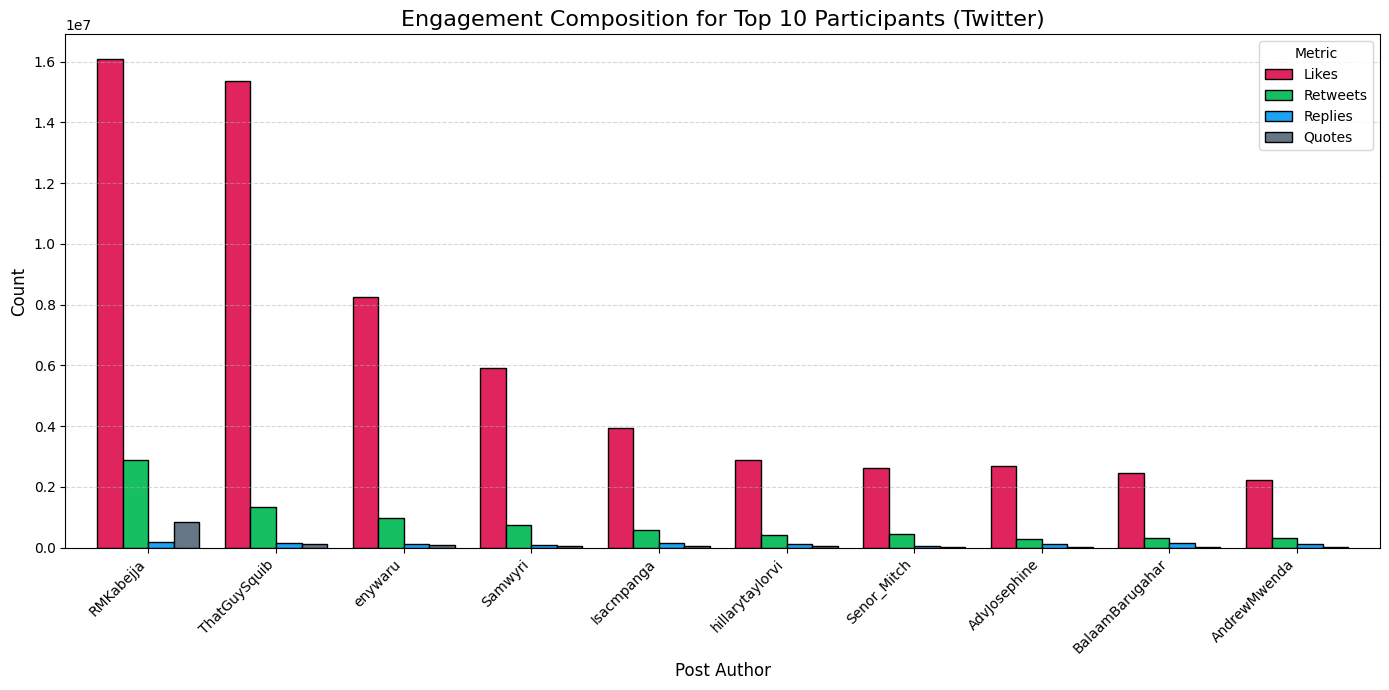

In [12]:
metrics = ['likeCount', 'retweetCount', 'replyCount_x', 'quoteCount_x']

posts_df[metrics] = posts_df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

author_stats = posts_df.groupby('post author')[metrics].sum()

author_stats['total_sum'] = author_stats.sum(axis=1)
top_10_breakdown = author_stats.sort_values(by='total_sum', ascending=False).head(10)

top_10_breakdown = top_10_breakdown.drop(columns=['total_sum'])

plt.figure(figsize=(12, 8))

colors = ['#E0245E', '#17BF63', '#1DA1F2', '#657786']

top_10_breakdown.plot(
    kind='bar',
    width=0.8,
    figsize=(14, 7),
    color=colors,
    edgecolor='black'
)

plt.title('Engagement Composition for Top 10 Participants (Twitter)', fontsize=16)
plt.xlabel('Post Author', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', labels=['Likes', 'Retweets', 'Replies', 'Quotes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Posts type distribution



In [13]:
import re

def clean_source(val):
    # Extracts "Twitter for iPhone" from "<a href...>Twitter for iPhone</a>"
    if pd.isna(val): return 'Unknown'
    match = re.search(r'>(.*?)<', str(val))
    return match.group(1) if match else val

def get_username(val):
    # Extracts username from stringified dicts like "{'userName': '...'}"
    if isinstance(val, dict): return val.get('userName')
    try:
        val_dict = ast.literal_eval(str(val))
        if isinstance(val_dict, dict): return val_dict.get('userName')
    except: return None
    return None


posts_df['source_clean'] = posts_df['source'].apply(clean_source)

posts_df['comment_author_handle'] = posts_df['author_y'].apply(get_username)

posts_df['post_date'] = pd.to_datetime(posts_df['date'], errors='coerce')
posts_df['comment_date'] = pd.to_datetime(posts_df['timestamp'], unit='ms', errors='coerce')

def get_post_type(row):
    if row.get('isRetweet') == True: return 'Retweet'
    if row.get('isQuote') == True: return 'Quote Tweet'
    return 'Original Post'

posts_df['post_type_label'] = posts_df.apply(get_post_type, axis=1)

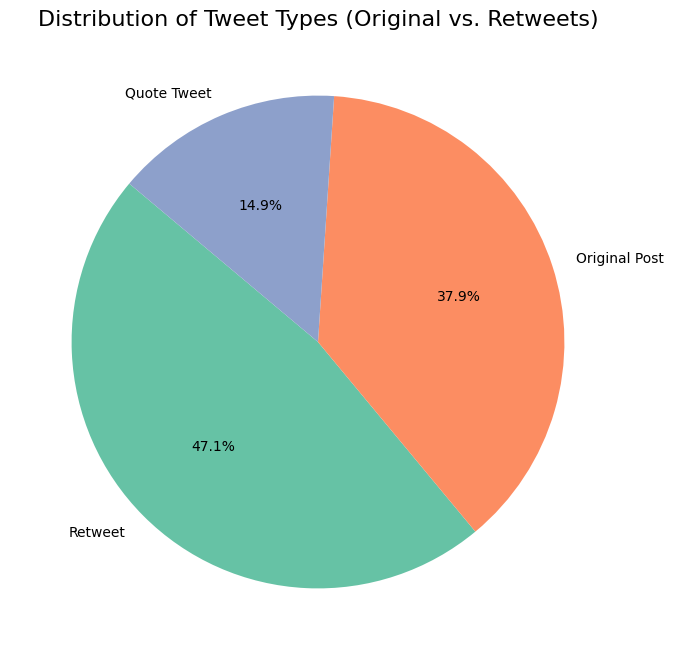

In [14]:
plt.figure(figsize=(8, 8))
type_counts = posts_df['post_type_label'].value_counts()

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',
        colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], startangle=140)
plt.title('Distribution of Tweet Types (Original vs. Retweets)', fontsize=16)
plt.show()

## Platforms being used


/tmp/ipython-input-1895550957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, palette='magma')


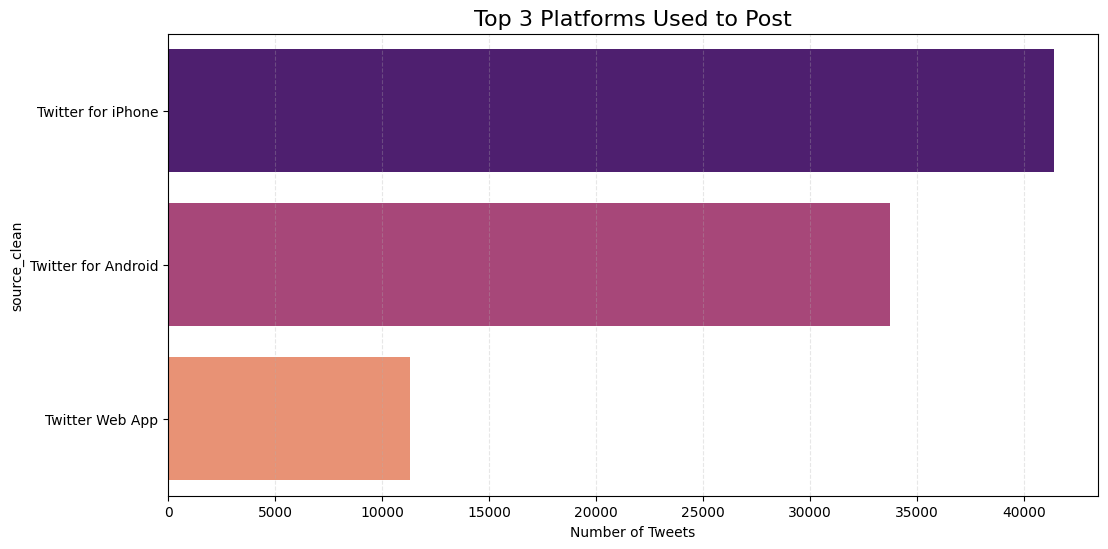

In [15]:
plt.figure(figsize=(12, 6))
top_sources = posts_df['source_clean'].value_counts().head(3)

sns.barplot(x=top_sources.values, y=top_sources.index, palette='magma')
plt.title('Top 3 Platforms Used to Post', fontsize=16)
plt.xlabel('Number of Tweets')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

# temporal analysis posts vs comments

In [16]:
comments_df.columns

Index(['postUrl', 'postId', 'replyId', 'inReplyTo', 'replyUrl', 'replyText',
       'timestamp', 'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle', 'replytext en',
       'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score'],
      dtype='object')

In [17]:
comments_df['comment_date'] = pd.to_datetime(comments_df['timestamp'], unit='ms', errors='coerce')
comments_df['comment_date']

,comment_date
1,2025-12-02 20:04:17
3,2025-12-03 01:09:22
4,2025-12-03 07:37:48
5,2025-12-03 08:27:54
6,2025-12-02 19:38:16
...,...
108446,2025-11-27 21:31:44
108628,2025-11-10 20:30:24
108749,2025-11-03 18:36:10
108866,2025-10-29 05:46:49


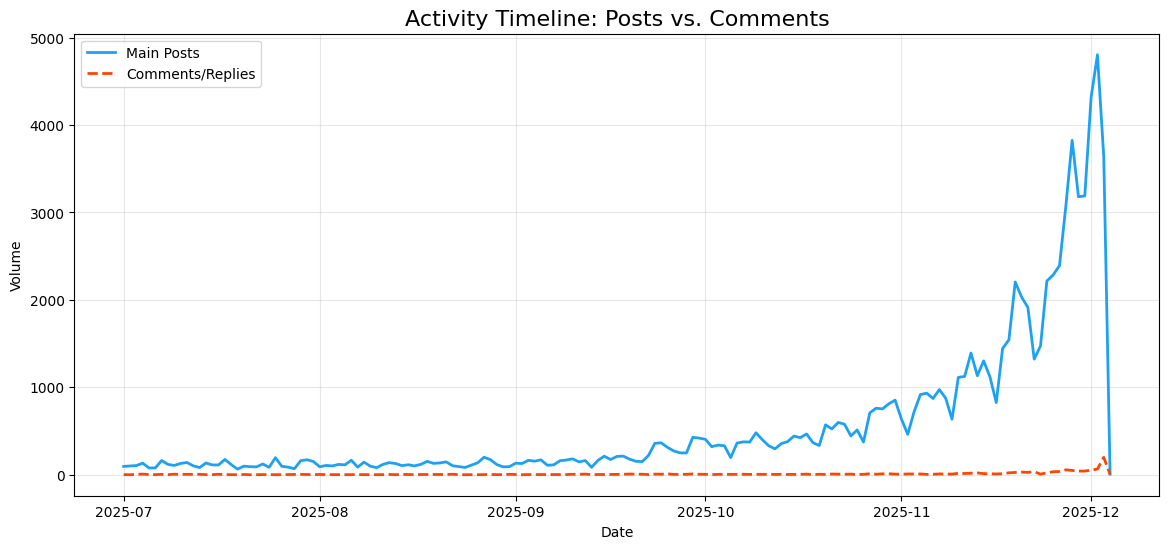

In [18]:
# Resample by Hour or Day
posts_over_time = posts_df.set_index('post_date').resample('D').size()
comments_over_time = comments_df.set_index('comment_date').resample('D').size()

plt.figure(figsize=(14, 6))
plt.plot(posts_over_time.index, posts_over_time.values, label='Main Posts', color='#1DA1F2', linewidth=2)
plt.plot(comments_over_time.index, comments_over_time.values, label='Comments/Replies', color='#FF4500', linestyle='--', linewidth=2)

plt.title('Activity Timeline: Posts vs. Comments', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Word cloud

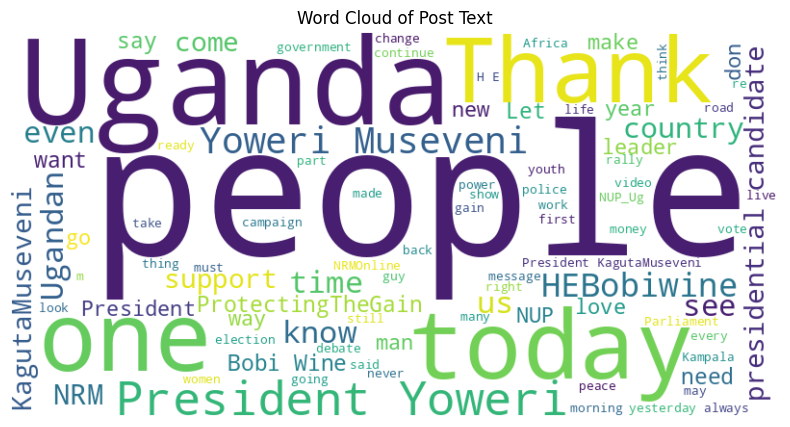

In [19]:
from wordcloud import WordCloud, STOPWORDS

def generate_word_cloud(df, text_column, title='Word Cloud'):
    """
    Generates and displays a word cloud from a specified text column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        text_column (str): The name of the column containing text data.
        title (str): The title for the word cloud plot. Default is 'Word Cloud'.
    """
    # Combine all text into a single string
    text_content = ' '.join(df[text_column].dropna().astype(str))

    # Define stopwords (you can add more if needed)
    stopwords = set(STOPWORDS)
    stopwords.update(["amp", "RT", "co", "https", "will", "The", "t", "s", "can", "u", "r", "just", "like", "get", "now", "good", "day"])

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords,
        min_font_size=10
    ).generate(text_content)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Call the function for the posts_df 'text' column
generate_word_cloud(posts_df, 'text', title='Word Cloud of Post Text')

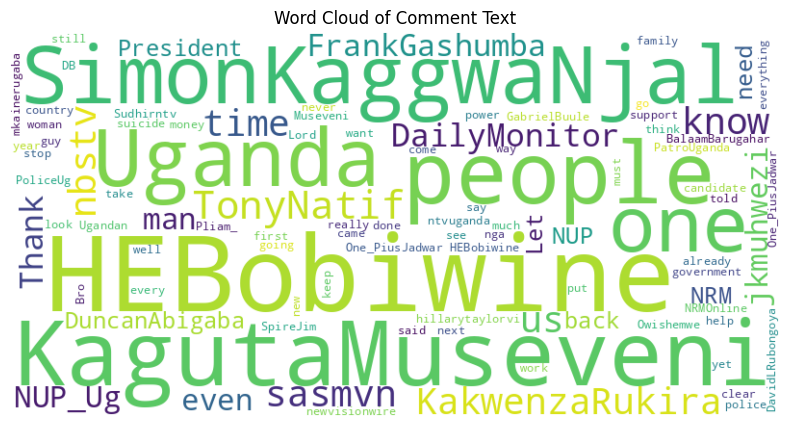

In [20]:
# comments word cloud

generate_word_cloud(comments_df, 'replyText', title='Word Cloud of Comment Text')

# top commentors

In [21]:
comments_df['author_y'].iloc[1]

"{'name': 'David', 'screenName': 'dollonice', 'followersCount': 85, 'favouritesCount': 7680, 'friendsCount': 171, 'description': ''}"

In [22]:
def extract_comment_handle(val, key: str = "screenName"):
    # 1. Handle missing values (NaN/None)
    if pd.isna(val) or val == "":
        return None

    # 2. If it is already a dictionary, return the screenName
    if isinstance(val, dict):
        return val.get(key)

    # 3. If it is a string, parse it safely
    if isinstance(val, str):
        try:
            val_dict = ast.literal_eval(val)

            if isinstance(val_dict, dict):
                return val_dict.get(key)

        except (ValueError, SyntaxError):
            return None

    return None

# Apply the function to your DataFrame
comments_df['comment_handle'] = comments_df['author_y'].apply(extract_comment_handle)

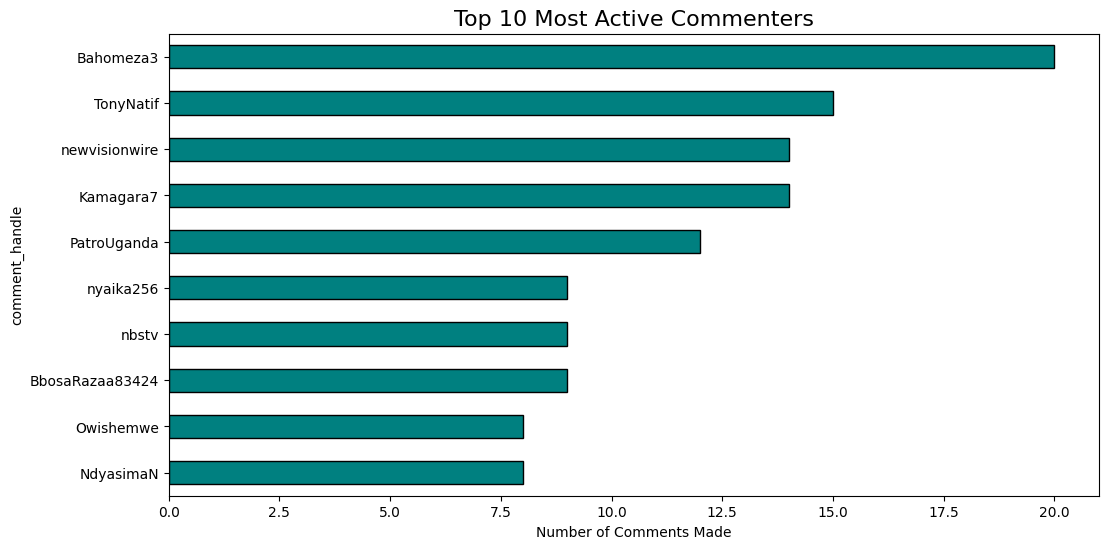

In [23]:
plt.figure(figsize=(12, 6))
top_commenters = comments_df['comment_handle'].value_counts().head(10)

top_commenters.sort_values().plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Most Active Commenters', fontsize=16)
plt.xlabel('Number of Comments Made')
plt.show()

# hashtags

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
def plot_hashtags_bigrams_trigrams(
    df,
    text_col,
    top_n=15,
    stop_words='english'
):
    # ---------- HASHTAGS ----------
    hashtags = (
        df[text_col]
        .dropna()
        .astype(str)
        .str.lower()
        .apply(lambda x: re.findall(r"#(\w+)", x))
        .explode()
        .dropna()
    )

    top_tags = hashtags.value_counts().head(top_n)

    # ---------- N-GRAM FUNCTION ----------
    def extract_ngrams(text_series, n):
        vec = CountVectorizer(
            ngram_range=(n, n),
            stop_words=stop_words,
            max_features=top_n
        )
        bow = vec.fit_transform(text_series)
        sum_words = bow.sum(axis=0)

        ngrams = [
            (word, int(sum_words[0, idx]))
            for word, idx in vec.vocabulary_.items()
        ]

        return (
            pd.DataFrame(ngrams, columns=['Phrase', 'Count'])
            .sort_values('Count', ascending=False)
        )

    # ---------- TEXT CLEANING ----------
    text_clean = (
        df[text_col]
        .fillna('')
        .astype(str)
        .str.lower()
        # remove URLs
        .str.replace(r'https?://\S+', '', regex=True)
        # remove standalone RT
        .str.replace(r'\brt\b', '', regex=True)
        # normalize spaces
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
    )

    df_bigrams = extract_ngrams(text_clean, 2)
    df_trigrams = extract_ngrams(text_clean, 3)

    # ---------- PLOTTING ----------
    fig, axes = plt.subplots(3, 1, figsize=(16, 18))

    # Hashtags
    sns.barplot(
        x=top_tags.values,
        y=top_tags.index,
        ax=axes[0],
        palette='cool'
    )
    axes[0].set_title(f'Top {top_n} Dominant Hashtags')
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel('Hashtag')

    # Bigrams
    sns.barplot(
        data=df_bigrams,
        x='Count',
        y='Phrase',
        ax=axes[1],
        palette='autumn'
    )
    axes[1].set_title(f'Top {top_n} Recurring Narratives (Bigrams)')
    axes[1].set_xlabel('Count')
    axes[1].set_ylabel('Phrase')

    # Trigrams
    sns.barplot(
        data=df_trigrams,
        x='Count',
        y='Phrase',
        ax=axes[2],
        palette='viridis'
    )
    axes[2].set_title(f'Top {top_n} Recurring Narratives (Trigrams)')
    axes[2].set_xlabel('Count')
    axes[2].set_ylabel('Phrase')

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-3477507102.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


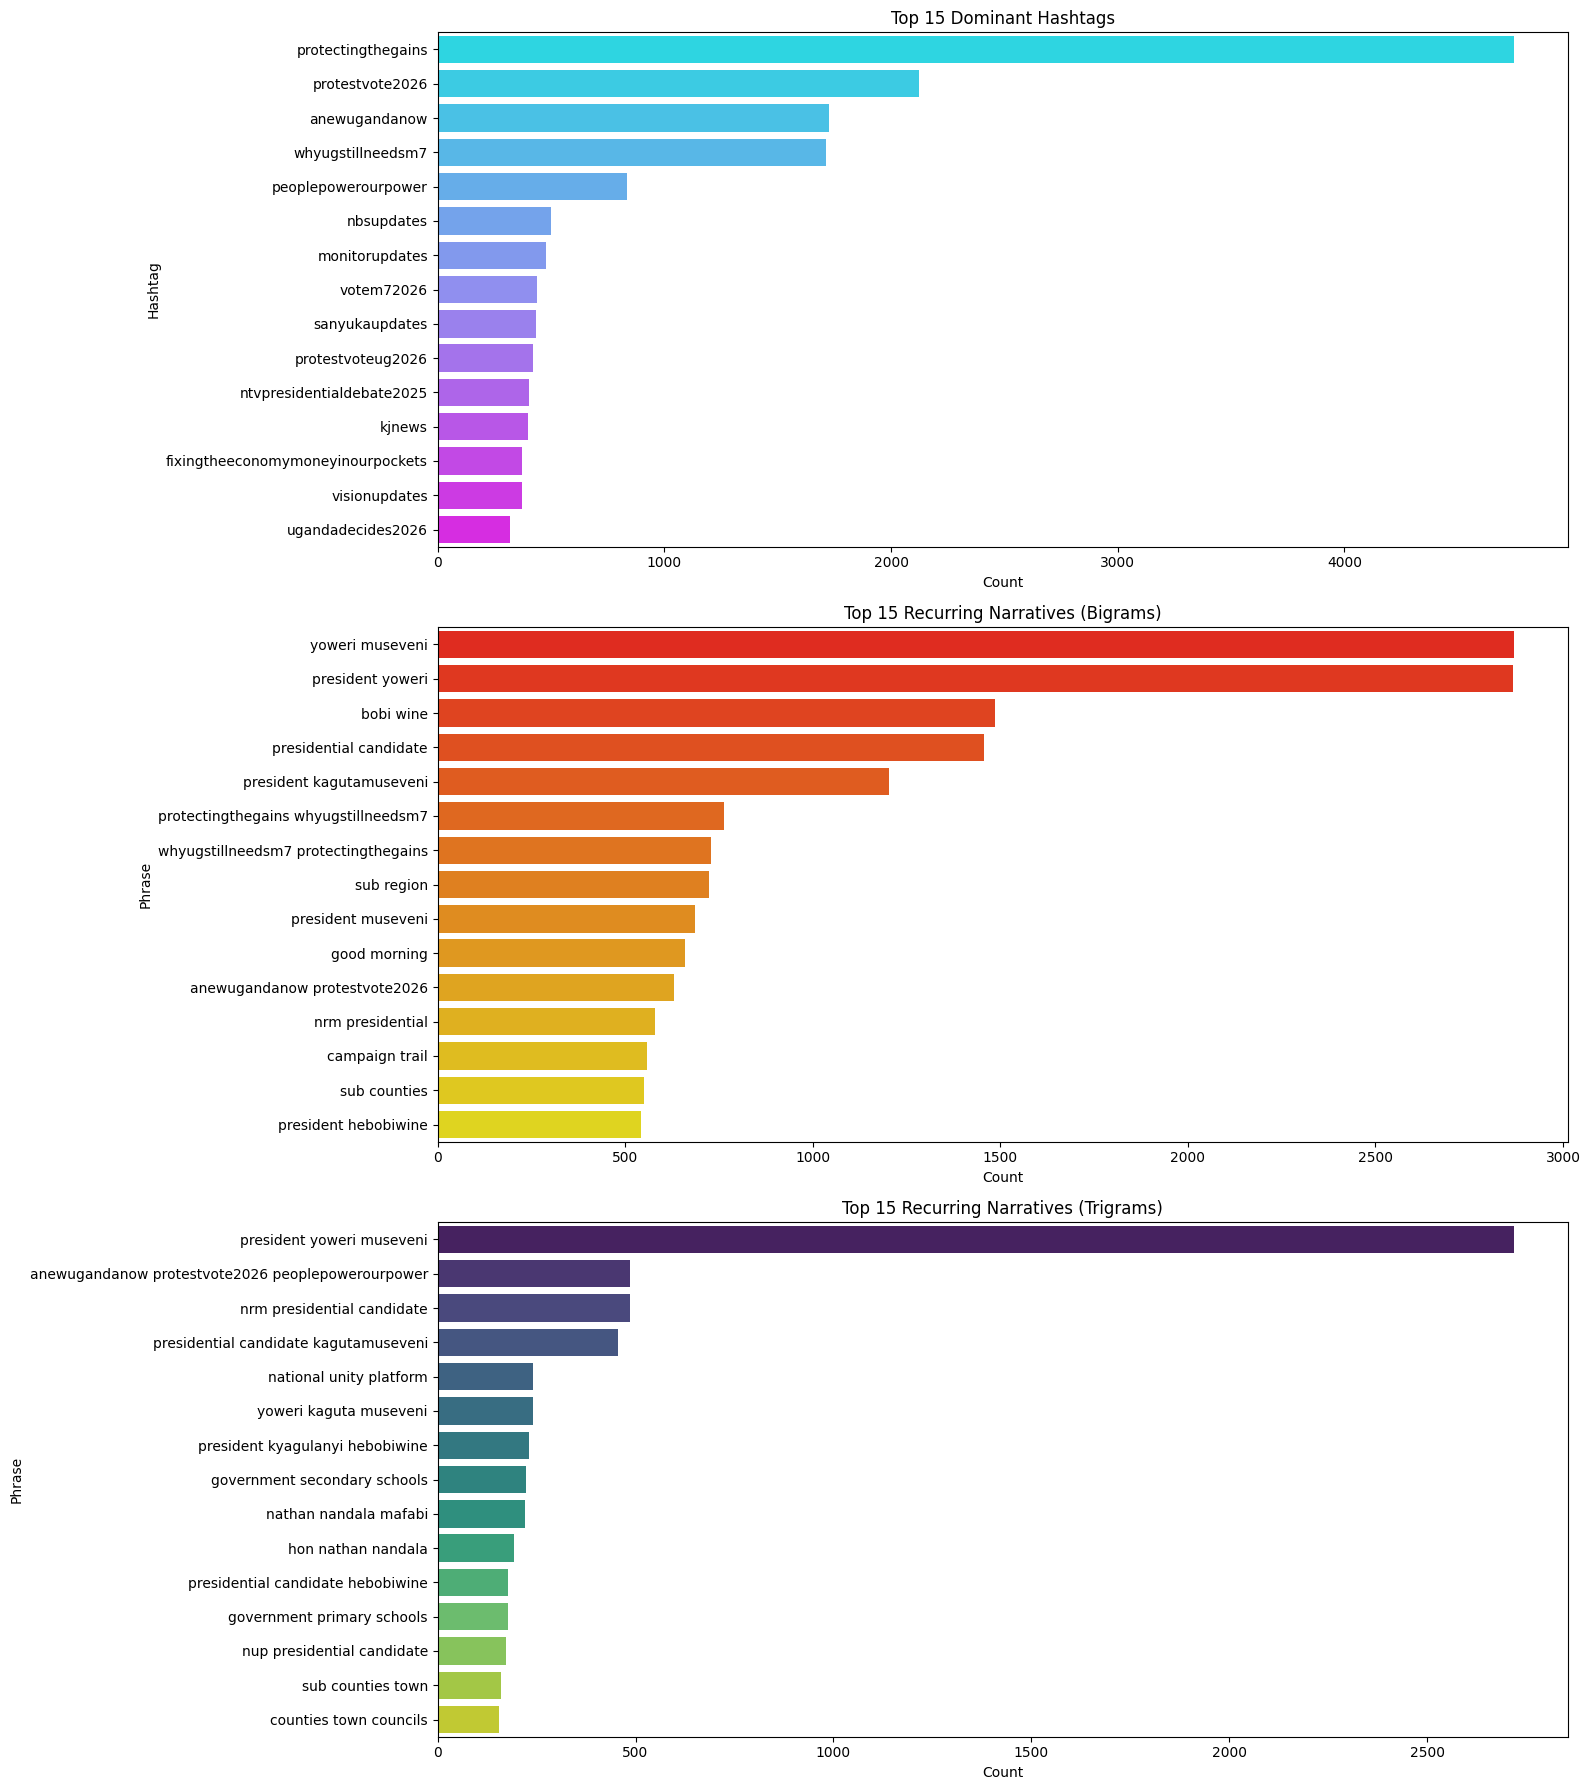

In [26]:
plot_hashtags_bigrams_trigrams(posts_df, "text")

### comments

/tmp/ipython-input-3477507102.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


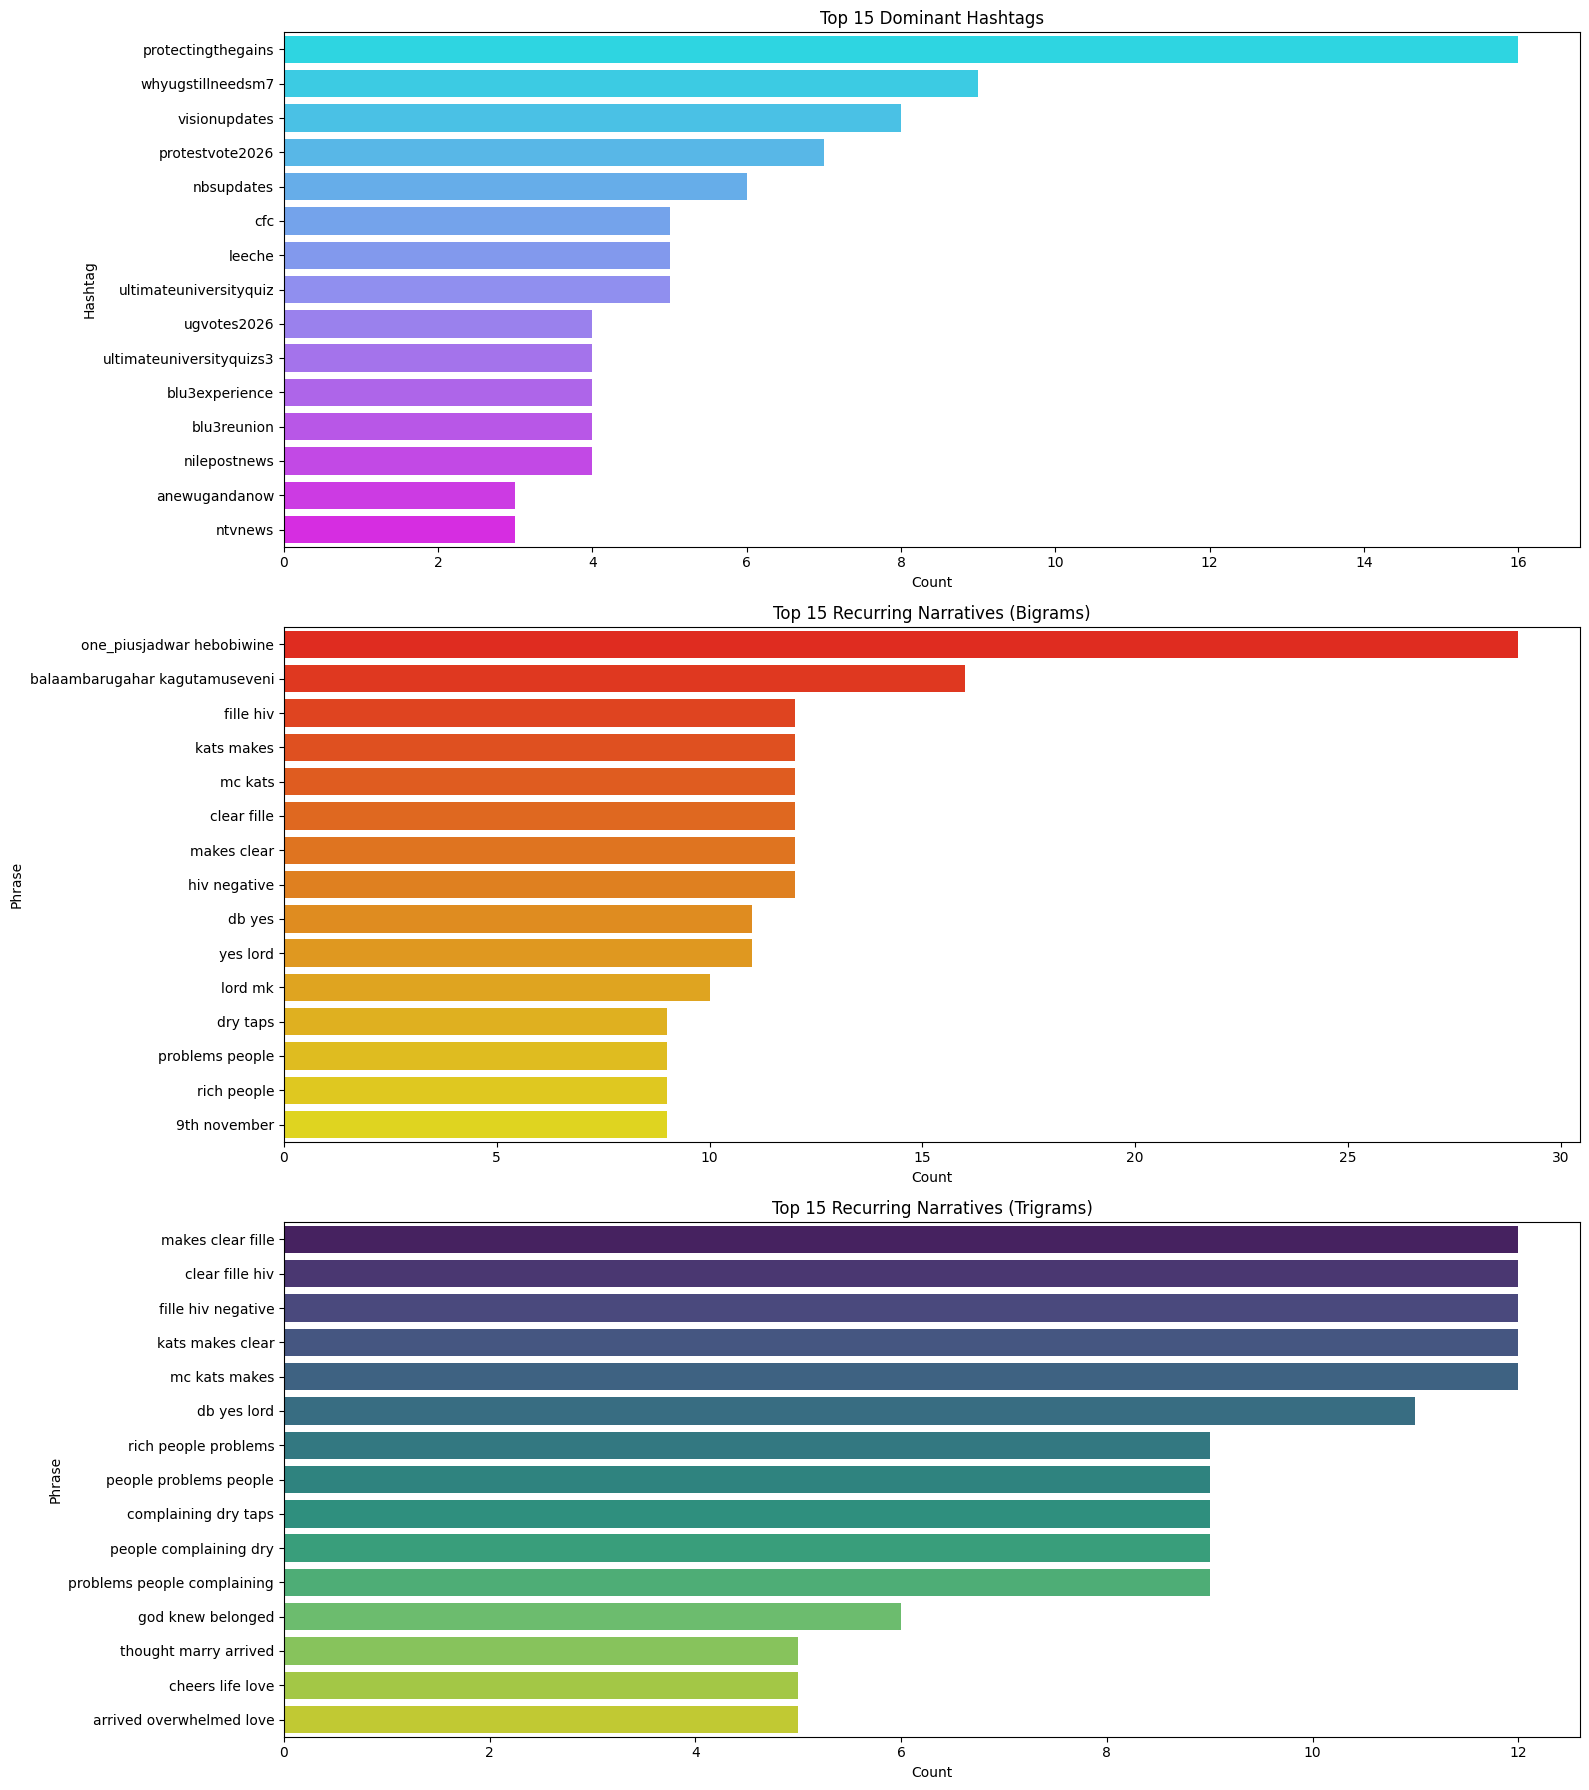

In [27]:
plot_hashtags_bigrams_trigrams(comments_df, "replyText")

# posts hashtags overtime

In [28]:
posts_df['hashtags'] = posts_df['text'].apply(lambda x: re.findall(r"#(\w+)", str(x)))
posts_df['hashtags']

,hashtags
0,"[UgVotes2026, NBSBarometer, NBSUpdates]"
1,"[UgVotes2026, NBSBarometer, NBSUpdates]"
2,"[UgVotes2026, NBSBarometer, NBSUpdates]"
3,"[UgVotes2026, NBSBarometer, NBSUpdates]"
4,"[UgVotes2026, NBSBarometer, NBSUpdates]"
...,...
109040,[LandGrabbing]
109056,[]
109057,[]
109058,[Breaking]


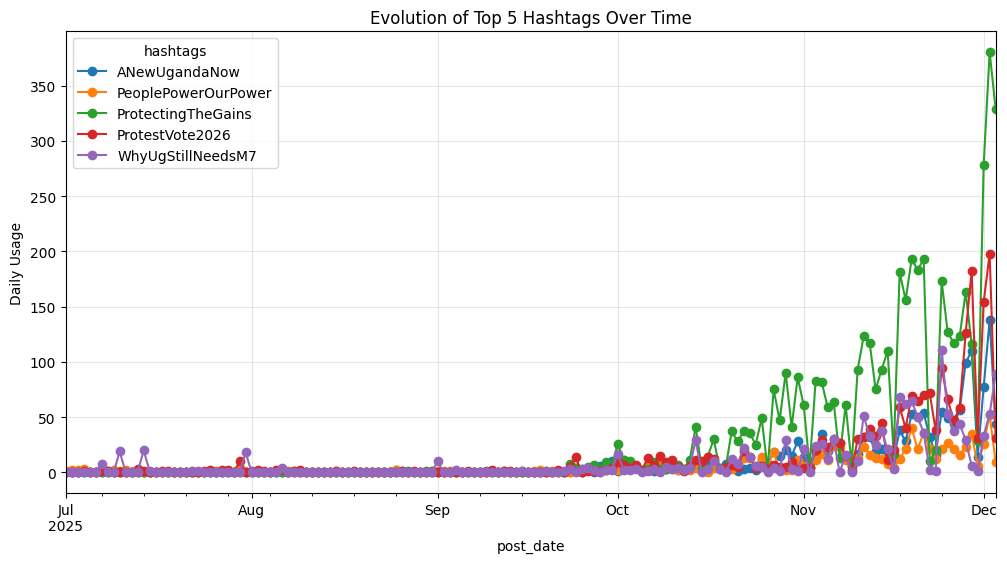

In [29]:
all_tags = posts_df['hashtags'].explode().dropna()
top_5 = all_tags.value_counts().head(5).index.tolist()

# Filter and explode
df_tags = posts_df[['post_date', 'hashtags']].explode('hashtags')
df_tags = df_tags[df_tags['hashtags'].isin(top_5)]

# Resample
evolution = df_tags.groupby(['post_date', 'hashtags']).size().unstack(fill_value=0).resample('D').sum()

plt.figure(figsize=(12, 6))
evolution.plot(marker='o', ax=plt.gca())
plt.title('Evolution of Top 5 Hashtags Over Time')
plt.ylabel('Daily Usage')
plt.grid(True, alpha=0.3)

## Analysis on political party mention

In [30]:
eng_metrics = ['likeCount', 'retweetCount', 'replyCount_x', 'quoteCount_x']
for col in eng_metrics:
    posts_df[col] = pd.to_numeric(posts_df[col], errors='coerce').fillna(0)

posts_df['total_engagement'] = posts_df[eng_metrics].sum(axis=1)

# Define the Parties and their Keywords
party_keywords = {
    'NUP': [r'\bnup\b', r'\bbobi wine\b', r'\bbobi\b'],
    'NRM': [r'\bnrm\b', r'\byoweri\b', r'\bmuseveni\b', r'\bsevo\b'],
    'FDC': [r'\bfdc\b', r'\bbesigye\b'],
    'PDP': [r'\bpdp\b'],
    'DP':  [r'\bdp\b']
}

# Function to check mentions
def check_party_mention(text, patterns):
    if pd.isna(text):
        return 0
    text_lower = str(text).lower()
    for pattern in patterns:
        if re.search(pattern, text_lower):
            return 1
    return 0

# Apply the function to 'fullText'
for party, patterns in party_keywords.items():
    posts_df[f'mention_{party}'] = posts_df['fullText'].apply(lambda x: check_party_mention(x, patterns))

# 5. Aggregate Data
party_stats = []

for party in party_keywords.keys():
    # Filter rows where this party was mentioned
    party_data = posts_df[posts_df[f'mention_{party}'] == 1]

    # Calculate stats
    count = len(party_data)
    avg_eng = party_data['total_engagement'].mean() if count > 0 else 0

    party_stats.append({
        'Party': party,
        'Post_Volume': count,
        'Avg_Engagement': avg_eng
    })

stats_df = pd.DataFrame(party_stats).sort_values(by='Post_Volume', ascending=False)
print(stats_df)

  Party  Post_Volume  Avg_Engagement
1   NRM         8385      323.647704
0   NUP         3838      638.755862
2   FDC          845      431.622485
4    DP           64      383.296875
3   PDP            0        0.000000


/tmp/ipython-input-2998536875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


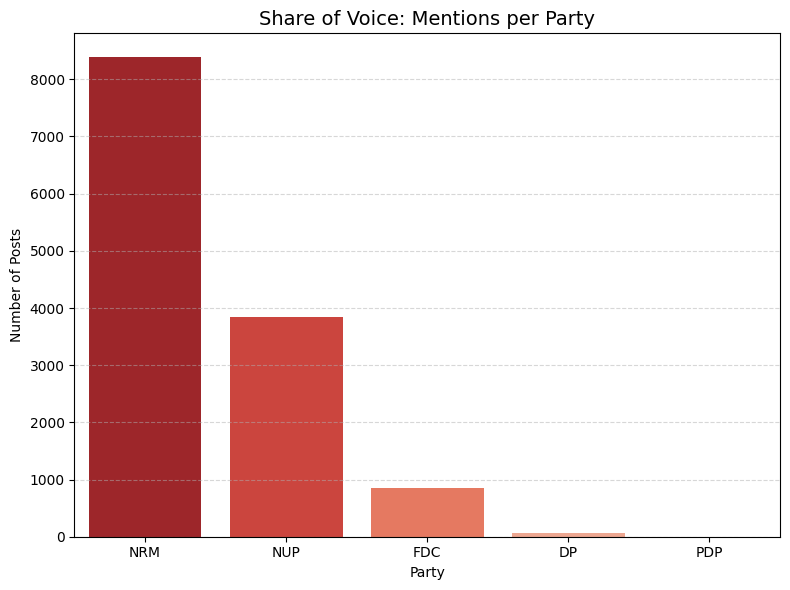

In [31]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=stats_df,
    x='Party',
    y='Post_Volume',
    palette='Reds_r'
)

plt.title('Share of Voice: Mentions per Party', fontsize=14)
plt.ylabel('Number of Posts')
plt.xlabel('Party')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-848586865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


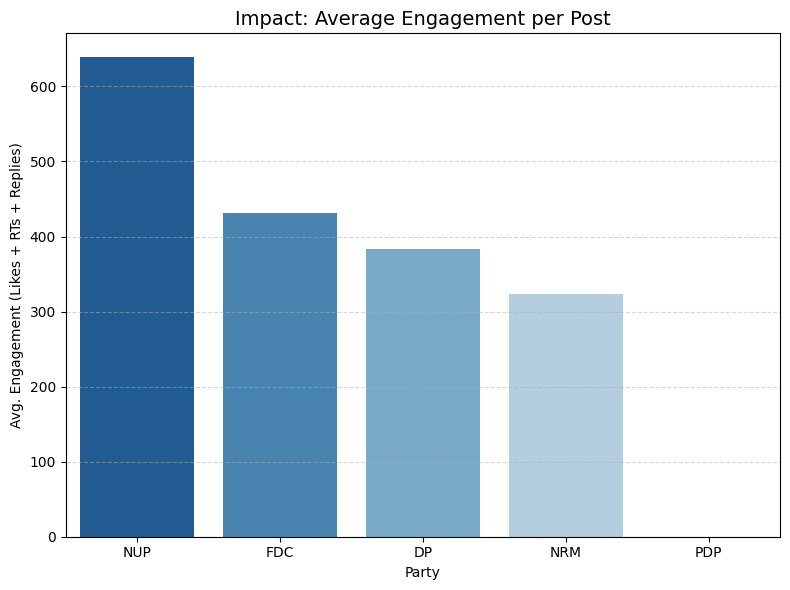

In [32]:
# Sort by engagement
stats_df_eng = stats_df.sort_values(by='Avg_Engagement', ascending=False)

plt.figure(figsize=(8, 6))

sns.barplot(
    data=stats_df_eng,
    x='Party',
    y='Avg_Engagement',
    palette='Blues_r'
)

plt.title('Impact: Average Engagement per Post', fontsize=14)
plt.ylabel('Avg. Engagement (Likes + RTs + Replies)')
plt.xlabel('Party')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Political party Engagement overtime




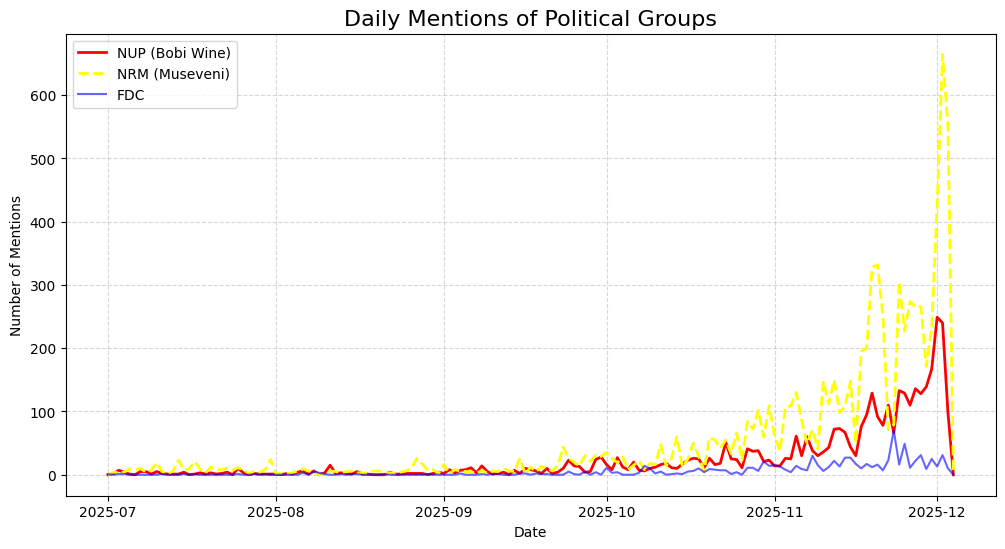

In [33]:
# Select the party columns + date
df_time = posts_df[['date', 'mention_NUP', 'mention_NRM', 'mention_FDC', 'mention_DP', 'mention_PDP']].copy()

# Set date index and resample by Day or Week
party_time = df_time.set_index('date').resample('D').sum()

# Plot
plt.figure(figsize=(12, 6))
# Plotting specific columns
plt.plot(party_time.index, party_time['mention_NUP'], label='NUP (Bobi Wine)', color='red', linewidth=2)
plt.plot(party_time.index, party_time['mention_NRM'], label='NRM (Museveni)', color='yellow', linewidth=2, linestyle='--')
plt.plot(party_time.index, party_time['mention_FDC'], label='FDC', color='blue', alpha=0.6)

plt.title('Daily Mentions of Political Groups', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Sentiment Analysis

In [34]:
comments_df.columns

Index(['postUrl', 'postId', 'replyId', 'inReplyTo', 'replyUrl', 'replyText',
       'timestamp', 'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle', 'replytext en',
       'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score',
       'comment_date', 'comment_handle'],
      dtype='object')

In [35]:
sentiment_maplet = {
    "LABEL_0" : "negative",
    "LABEL_1" : "neutral",
    "LABEL_2" : "positive"
}

comments_df['sentiment'] = comments_df['sentiment reply'].map(sentiment_maplet)
comments_df['sentiment']

,sentiment
1,neutral
3,negative
4,neutral
5,negative
6,neutral
...,...
108446,neutral
108628,neutral
108749,neutral
108866,negative


Overall Sentiment Distribution (%):
sentiment
neutral     60.252600
negative    23.402675
positive    16.344725
Name: proportion, dtype: float64


/tmp/ipython-input-4218238780.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


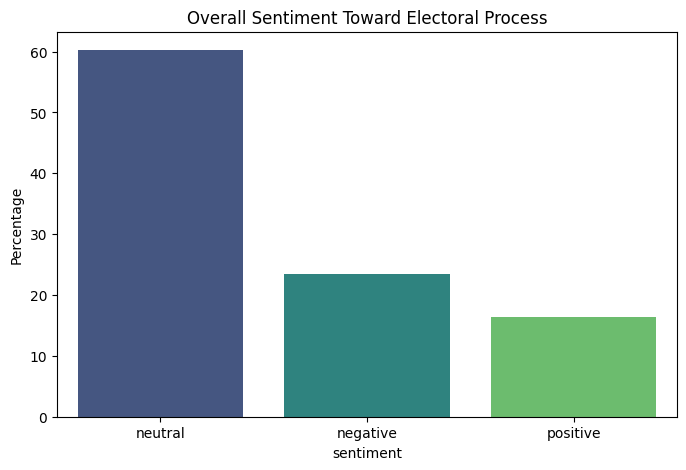

In [36]:
# Calculate the percentage of each sentiment
sentiment_counts = comments_df['sentiment'].value_counts(normalize=True) * 100

print("Overall Sentiment Distribution (%):")
print(sentiment_counts)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Overall Sentiment Toward Electoral Process')
plt.ylabel('Percentage')
plt.show()

### Emotion distribution

Dominant Emotions:
emotion reply
neutral       1027
curiosity       48
admiration      46
gratitude       36
amusement       35
Name: count, dtype: int64


/tmp/ipython-input-3601604301.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette='magma')


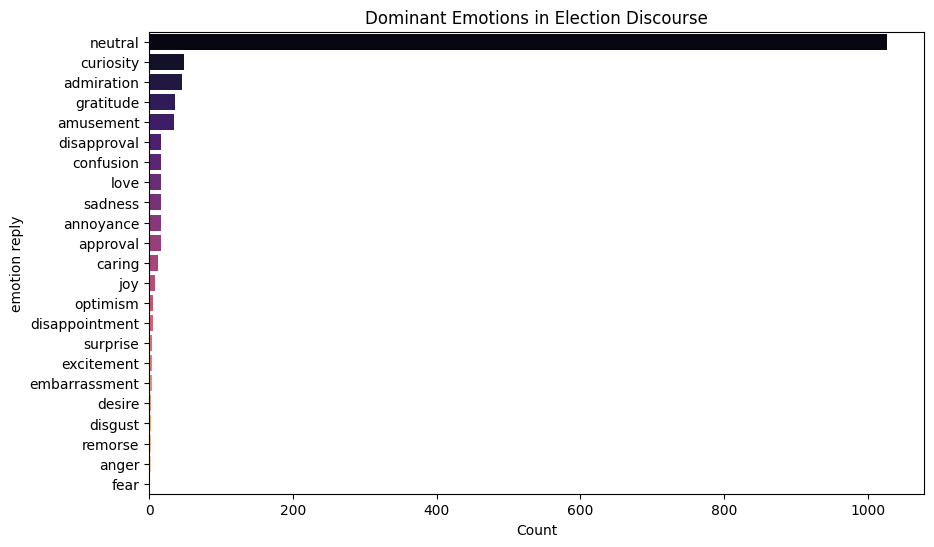

In [37]:
# Count the occurrences of each emotion
emotion_counts = comments_df['emotion reply'].value_counts()

print("Dominant Emotions:")
print(emotion_counts.head())

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette='magma')
plt.title('Dominant Emotions in Election Discourse')
plt.xlabel('Count')
plt.show()

In [38]:
comments_df.columns

Index(['postUrl', 'postId', 'replyId', 'inReplyTo', 'replyUrl', 'replyText',
       'timestamp', 'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle', 'replytext en',
       'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score',
       'comment_date', 'comment_handle', 'sentiment'],
      dtype='object')

<Figure size 1400x700 with 0 Axes>

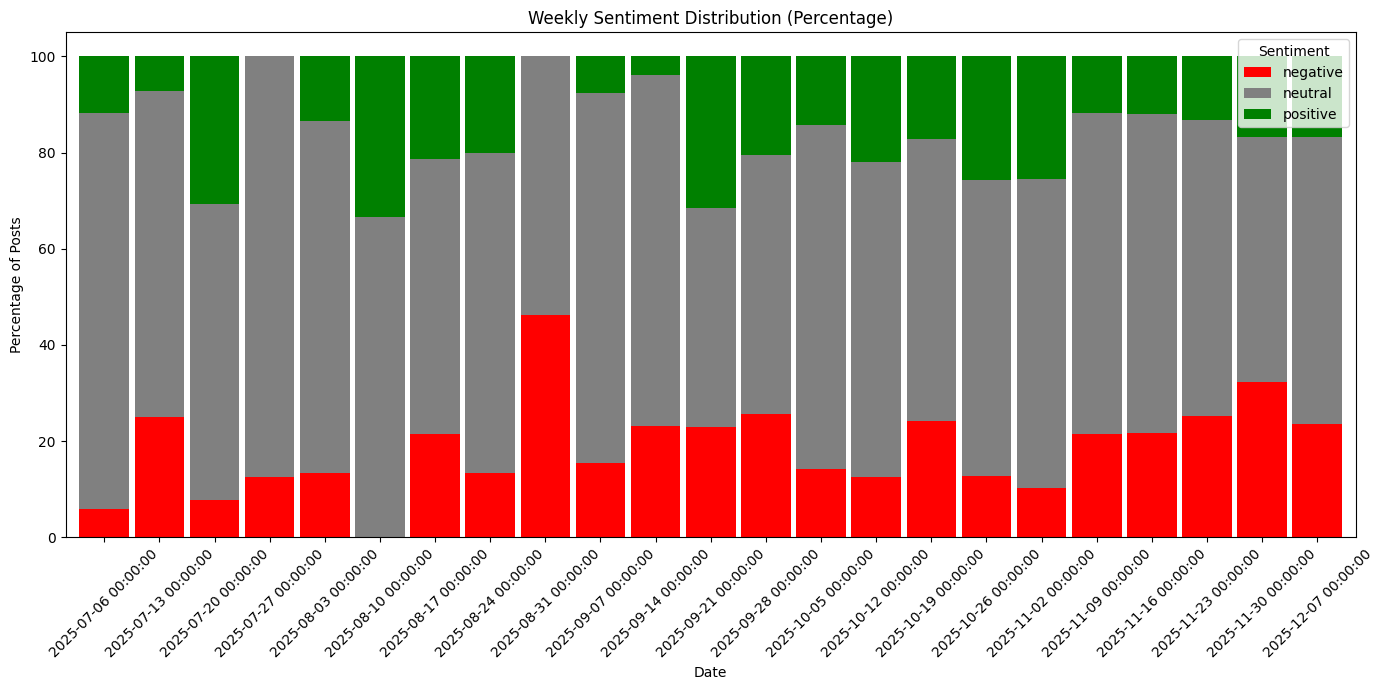

In [39]:
# Group by Week ('W') and Sentiment Category
# You can change 'W' to 'D' for daily or 'M' for monthly
sentiment_over_time = comments_df.groupby([pd.Grouper(key='comment_date', freq='W'), 'sentiment']).size().unstack(fill_value=0)

# 2. Normalize to Percentage
# This shows the PROPORTION of sentiment (0-100%) per week
sentiment_percent = sentiment_over_time.div(sentiment_over_time.sum(axis=1), axis=0) * 100

# 3. Plotting
plt.figure(figsize=(14, 7))
sentiment_percent.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], width=0.9, figsize=(14, 7))

plt.title('Weekly Sentiment Distribution (Percentage)')
plt.xlabel('Date')
plt.ylabel('Percentage of Posts')
plt.legend(title='Sentiment')

# Clean up x-axis dates for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sentiment

In [40]:
# Candidate keywords
candidate_keywords = {
    "bobi wine": [r"\bbobi\b", r"\bbobi wine\b", r"\bkyagulanyi\b"],
    "yoweri museveni": [r"\bmuseveni\b", r"\bm7\b", r"\byoweri\b"],
    "mugisha muntu": [r"\bmugisha muntu\b", r"\bmuntu\b"],
    "kasibante robert": [r"\bkasibante\b", r"\brobert kasibante\b"]
}

# Electoral system keywords
system_keywords = [
    r"\belectoral commission\b",
    r"\bec\b",
    r"\bcommission\b",
    r"\belections?\b",
    r"\bvoting\b",
    r"\bballot\b",
    r"\bresults?\b",
    r"\bconstitution\b",
    r"\bdemocracy\b",
    r"\bvote rigging\b",
    r"\bfraud\b"
]


In [41]:
def contains_keywords(text, patterns):
    if pd.isna(text):
        return False
    text = text.lower()
    return any(re.search(p, text) for p in patterns)


In [42]:
comments_df.columns

Index(['postUrl', 'postId', 'replyId', 'inReplyTo', 'replyUrl', 'replyText',
       'timestamp', 'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle', 'replytext en',
       'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score',
       'comment_date', 'comment_handle', 'sentiment'],
      dtype='object')

In [43]:
# Candidate-focused
comments_df["is_candidate_post"] = comments_df["replytext en"].apply(
    lambda x: any(
        contains_keywords(x, patterns)
        for patterns in candidate_keywords.values()
    )
)

# Electoral-system-focused
comments_df["is_system_post"] = comments_df["replytext en"].apply(
    lambda x: contains_keywords(x, system_keywords)
)


In [44]:
# remove overlap if you want pure comparisons only
df_pure = comments_df[
    (comments_df["is_candidate_post"] ^ comments_df["is_system_post"])
].copy()


In [45]:
# Define focus label
df_viz = df_pure.copy()

df_viz["focus"] = None
df_viz.loc[df_viz["is_candidate_post"], "focus"] = "Candidates"
df_viz.loc[df_viz["is_system_post"], "focus"] = "Electoral System"

# Keep only pure-focus posts
df_viz = df_viz[df_viz["focus"].notna()]
df_viz = df_viz[~(df_viz["is_candidate_post"] & df_viz["is_system_post"])]


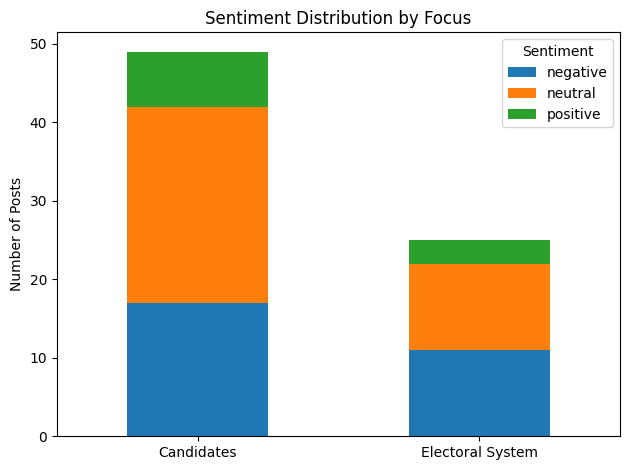

In [46]:
sentiment_dist = (
    df_viz
    .groupby(["focus", "sentiment"])
    .size()
    .unstack(fill_value=0)
)

sentiment_dist.plot(kind="bar", stacked=True)
plt.title("Sentiment Distribution by Focus")
plt.ylabel("Number of Posts")
plt.xlabel("")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


In [47]:
def identify_candidate(text):
    if pd.isna(text):
        return None
    text = text.lower()
    for candidate, patterns in candidate_keywords.items():
        if any(re.search(p, text) for p in patterns):
            return candidate
    return None

In [48]:
df_candidates = df_pure[df_pure["is_candidate_post"]].copy()
df_candidates["candidate"] = df_candidates["replytext en"].apply(identify_candidate)

In [49]:
sentiment_counts = (
    df_candidates
    .groupby(["candidate", "sentiment"])
    .size()
    .unstack(fill_value=0)
)

<Figure size 640x480 with 0 Axes>

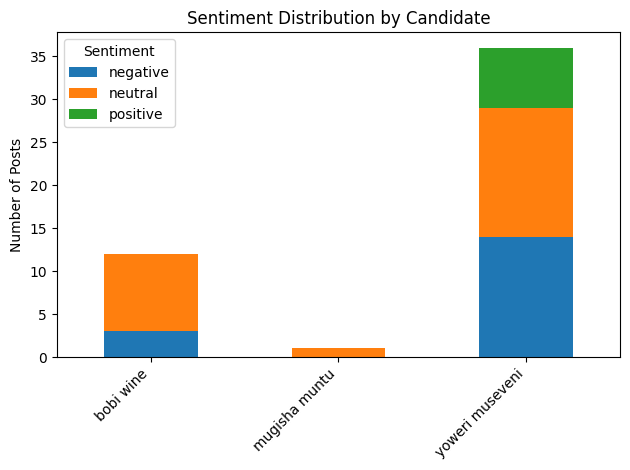

In [50]:
plt.figure()
sentiment_counts.plot(kind="bar", stacked=True)
plt.title("Sentiment Distribution by Candidate")
plt.ylabel("Number of Posts")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
